# Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'
tag_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

tag_name =pd.read_csv(tag_file, sep=',',header=None)

    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Rubric #1 Basic Summary of the Data Set 

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(train['labels'])

# TODO: Number of validation examples
n_validation = len(valid['labels'])

# TODO: Number of testing examples.
n_test = len(test['labels'])

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:] # train['']

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(train['labels']).shape[0]

print("Number of training examples =", n_train,)
print("Number of testing examples =", n_test)
print ("Number of validating examples = ", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of validating examples =  4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
from sklearn.model_selection import train_test_split
import cv2
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size = 0.2, random_state = 0)
print ('Image Shape{}'.format(X_train[0].shape))

Image Shape(32, 32, 3)


### Rubric #2 Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('OK')

OK


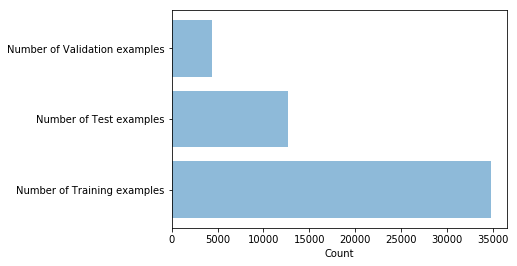

In [5]:
objects = ('Number of Training examples', 'Number of Test examples', 'Number of Validation examples')
y_pos = np.arange(len(objects))
performance = [n_train,n_test,n_validation]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.show()

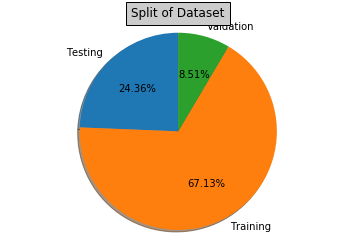

In [6]:
# Pie chart showing the split of data set
pie_labels = 'Testing', 'Training', 'Vaidation'
pie_sizes = [n_test,n_train,n_validation]
explode = (0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode=explode, labels=pie_labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Split of Dataset', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

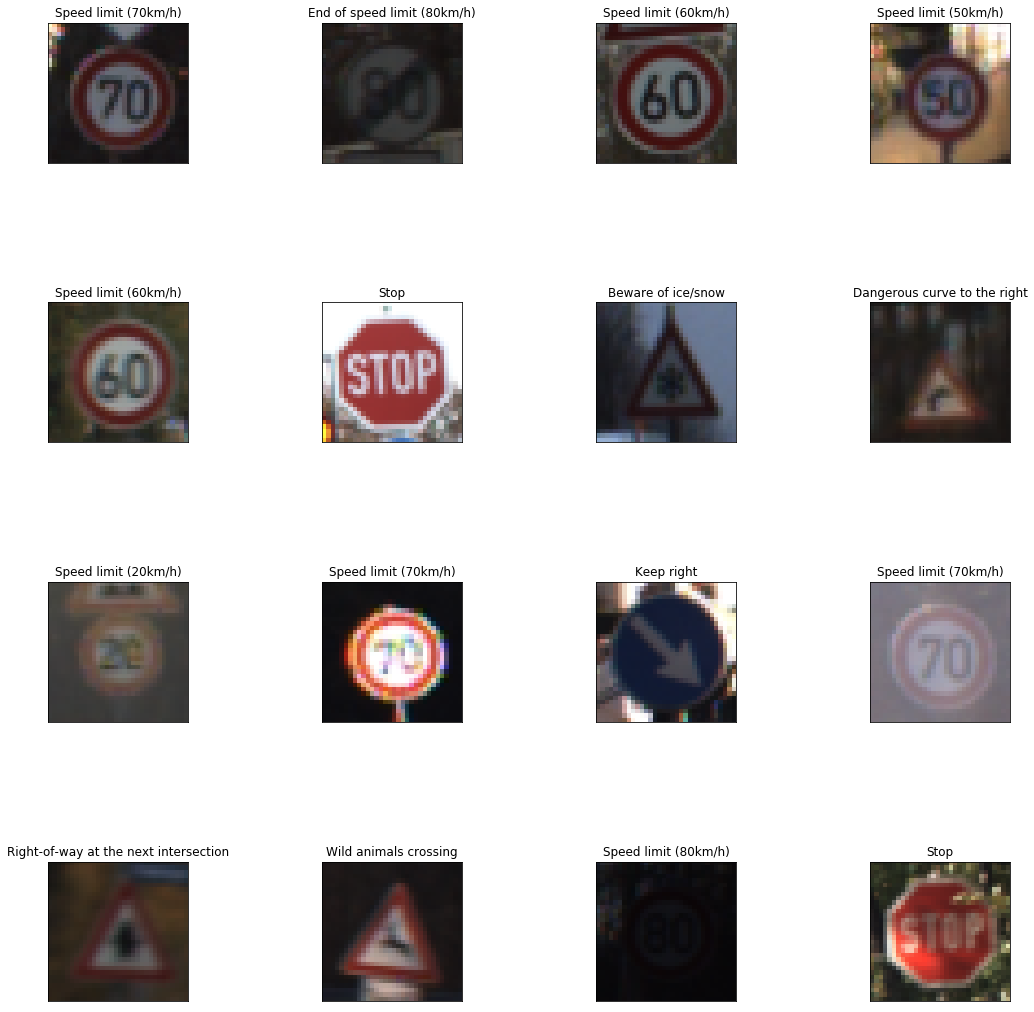

In [7]:
# check random images and see if the data set is corrected labeled or not
def show_images(rows=3,cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(18, 18), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=1, wspace=0.5)
    for i in range(rows):
            for j in range(cols):
                index =  random.randint(0, len(X_train))
                axes[i][j].imshow(X_train[index])
                axes[i][j].set_title(tag_name[1][y_train[index]+1])
    plt.show()
show_images(4,4)

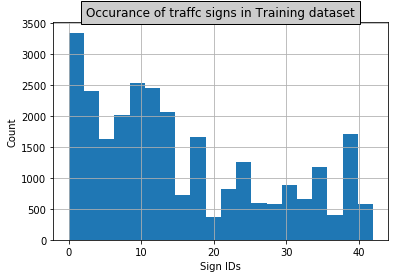

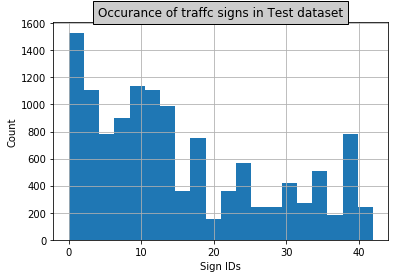

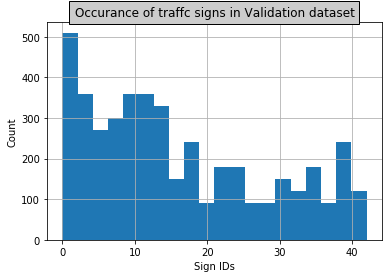

In [8]:
plt.hist(y_train,bins=20)
plt.xlabel('Sign IDs')
plt.ylabel('Count')
plt.title('Occurance of traffc signs in Training dataset',bbox={'facecolor':'0.8', 'pad':5})
plt.grid()
plt.show()

plt.hist(y_test,bins=20)
plt.xlabel('Sign IDs')
plt.ylabel('Count')
plt.title('Occurance of traffc signs in Test dataset',bbox={'facecolor':'0.8', 'pad':5})
plt.grid()
plt.show()

plt.hist(y_valid,bins=20)
plt.xlabel('Sign IDs')
plt.ylabel('Count')
plt.title('Occurance of traffc signs in Validation dataset',bbox={'facecolor':'0.8', 'pad':5})
plt.grid()
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Rubric #3 Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
from sklearn.utils import shuffle
from skimage import exposure
X_train, y_train = shuffle(X_train, y_train)

### Image Augmentation using brighness, bluring, rotation, scaling

In [10]:
def augment_light(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5 + np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1
def augment_blur(image):
    image1 = image.copy()
    image2 = cv2.GaussianBlur(image1, (5,5), 20.0)
    return cv2.addWeighted(image, 2, image2, -1, 0)
def augment_random_rotate(image):
    c_x,c_y = int(image.shape[0]/2), int(image.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(image, Mat, image.shape[:2])

def augment_random_scale(image):
    img2=image.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(image, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    dy = int((img2.shape[1]-image.shape[0])/2)
    end = image.shape[1]-dy
    img2 = img2[dy:end,:,:]
    assert img2.shape[0] == 32
    return img2
def augment_image(image):
    image1 = augment_light(image)
    image2 = augment_blur(image1)
    image3 = augment_random_rotate(image2)
    image4 = augment_random_scale(image3)
    return image3
print('OK')

OK


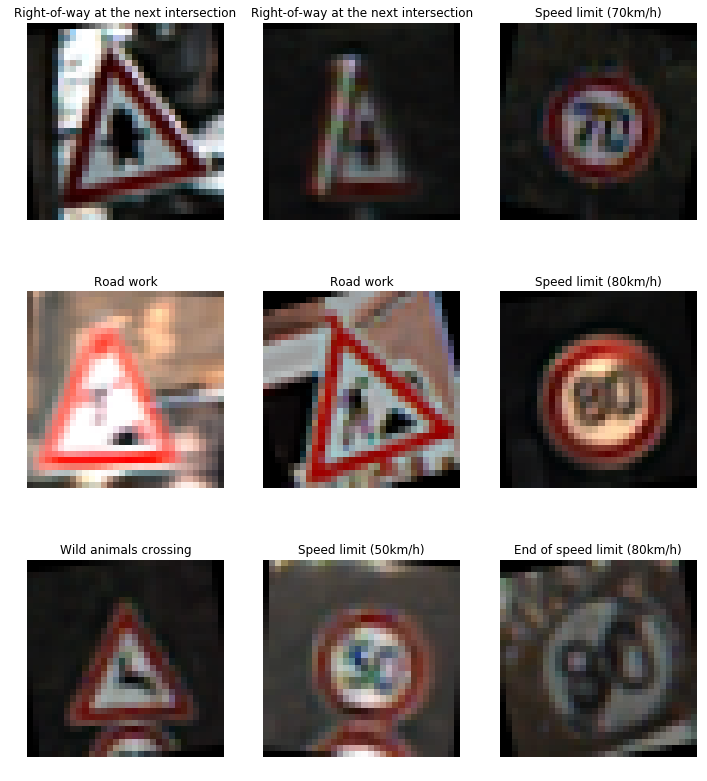

In [11]:
## Create more dataset

more_x_train_rgb = []
more_x_test_rgb = []
more_x_valid_rgb = []

more_y_train_rgb = []
more_y_test_rgb = []
more_y_valid_rgb = []

for x_,y_ in zip(X_train, y_train):
    image1 = augment_image(x_)
    more_x_train_rgb.append(image1)
    more_y_train_rgb.append(y_)

for x_,y_ in zip(X_test, y_test):
    image1 = augment_image(x_)
    more_x_test_rgb.append(image1)
    more_y_test_rgb.append(y_)

for x_,y_ in zip(X_valid, y_valid):
    image1 = augment_image(x_)
    more_x_valid_rgb.append(image1)
    more_y_valid_rgb.append(y_)
        
def show_images_light(nrows=3,ncols=3):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for i in range(nrows):
        for j in range(ncols):
            idx = j + i * nrows
            axs[idx].imshow(more_x_train_rgb[idx].squeeze(), plt.gray())
            axs[idx].set_axis_off()
            axs[idx].set_title(tag_name[1][more_y_train_rgb[idx]+1])
            
    plt.show()
    
show_images_light(3,3)

In [12]:
more_x_train = np.array(more_x_train_rgb)
more_y_train = np.array(more_y_train_rgb)

more_x_test = np.array(more_x_test_rgb)
more_y_test = np.array(more_y_test_rgb)

more_x_valid = np.array(more_x_valid_rgb)
more_y_valid = np.array(more_y_valid_rgb)

print ('OK')

OK


In [13]:
X_train_new = np.concatenate((X_train, more_x_train), axis=0)
y_train_new = np.concatenate((y_train, more_y_train), axis=0)

X_test_new = np.concatenate((X_test, more_x_test), axis=0)
y_test_new = np.concatenate((y_test, more_y_test), axis=0)

X_valid_new = np.concatenate((X_valid, more_x_valid), axis=0)
y_valid_new = np.concatenate((y_valid, more_y_valid), axis=0)

print('OK')

OK


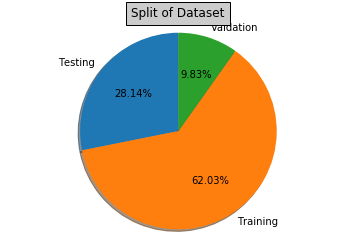

New train data set size: 55678
New test data set size: 25260
New valid data set size: 8820


In [14]:
pie_labels = 'Testing', 'Training', 'Vaidation'
pie_sizes = [X_test_new.shape[0],X_train_new.shape[0],X_valid_new.shape[0]]
explode = (0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode=explode, labels=pie_labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Split of Dataset', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

print ('New train data set size:', X_train_new.shape[0])
print ('New test data set size:', X_test_new.shape[0])
print ('New valid data set size:', X_valid_new.shape[0])

RGB shape: (55678, 32, 32, 3)
Grayscale shape: (55678, 32, 32, 1)


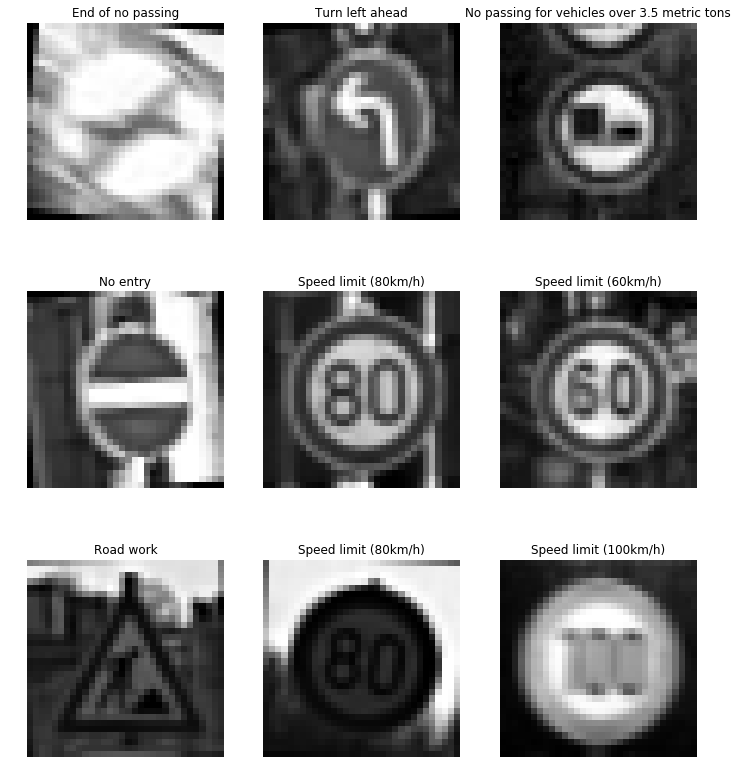

In [15]:
X_train_rgb = X_train_new
X_train_gry = np.sum(X_train_rgb/3, axis=3, keepdims=True)

X_test_rgb = X_test_new
X_test_gry = np.sum(X_test_rgb/3, axis=3, keepdims=True)

X_valid_rgb = X_valid_new
X_valid_gry = np.sum(X_valid_rgb/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

# check random images and see if the data set is corrected labeled or not
def show_images_gry(nrows=3,ncols=3):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    #print (rows,cols)
    for i in range(nrows):
        for j in range(ncols):
            idx = j + i * nrows
            index =  random.randint(0, len(X_train_gry))        
            axs[idx].imshow(X_train_gry[index].squeeze(), plt.gray())
            axs[idx].set_axis_off()
            axs[idx].set_title(tag_name[1][y_train_new[index]+1])
    plt.show()
    
show_images_gry(3,3)

In [16]:
X_train = X_train_gry
X_valid = X_valid_gry
X_test = X_test_gry

y_train = y_train_new
y_test  = y_test_new
y_valid = y_valid_new

print('OK')

OK


In [17]:
# Normalization
X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128
X_valid_normalized = (X_valid -128)/128

X_train = X_train_normalized
X_valid = X_valid_normalized
X_test = X_test_normalized

print('OK')

OK


### Rubric #4 Model Architecture
I have used the LeNet Architecutrue with some modification. Here are the layers I have used for LaNet:
1. Conv layer (input: 32x32x1, output: 28x28x6)
2. relu
3. Max pooling layer (input: 28x28x6, output: 14x14x6)
4. Conv layer (input: 14x14x6, output: 10x10x16)
5. relu
6. Max pooling layer (input: 10x10x16, output: 5x5x16)
7. Flatten (input: 5x5x16, output: 400)
8. FC layer (input: 400, output: 120)
9. relu
10. Dropout
11. FC layer(input: 120, output: 84)
12. relu
13. Dropout
14. FC layer (input: 84, output: 43)

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # Dropout 
    dr1 = tf.nn.dropout(fc1, drop_out) 
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dr1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout 
    dr2 = tf.nn.dropout(fc2, drop_out) 
    

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
drop_out = tf.placeholder(tf.float32)

#Hyperparameters
EPOCHS = 100
BATCH_SIZE = 156
rate = 0.001
dropout_rate = 0.5

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, drop_out:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('OK')

OK


### Rubric #5 Model Training
Here I have trained the model with hyperparmeters:
Number of Epoch = 100,
Batch Size = 156,
Learning rate = 0.001,
Dropout Rate = 0.5

In [22]:
validation_accuracy_data = []
test_accuracy_data = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,drop_out:1- dropout_rate})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_data.append(validation_accuracy)
        #test_accuracy = evaluate(X_test, y_test)
        #test_accuracy_data.append(test_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.601

EPOCH 2 ...
Validation Accuracy = 0.781

EPOCH 3 ...
Validation Accuracy = 0.843

EPOCH 4 ...
Validation Accuracy = 0.851

EPOCH 5 ...
Validation Accuracy = 0.885

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 7 ...
Validation Accuracy = 0.911

EPOCH 8 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.920

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.933

EPOCH 15 ...
Validation Accuracy = 0.936

EPOCH 16 ...
Validation Accuracy = 0.934

EPOCH 17 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.939

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 21 ...
Validation Accuracy = 0.941

EPOCH 22 ...
Validation Accuracy = 0.941

EPOCH 23 ...
Validation Accuracy = 0.942

EPOCH 24 ...
Validation Accura

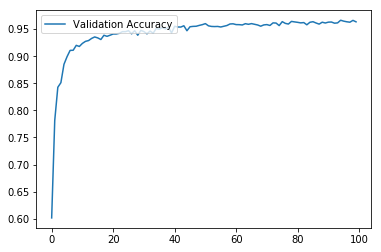

In [23]:
## Line graph for showing accuracy of valid and test
k = [x for x in range(0,EPOCHS)]
plt.plot(k, validation_accuracy_data)
#plt.plot(k, 1- test_accuracy_data)
plt.legend(['Validation Accuracy'], loc='upper left')
plt.show()

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.935


### Rubric #6 Solution Approach

Frist I tried with the given LaNet arcitecture. and modified the input and ouput size of the model. That gave me validation accuracy of ~91%. Later I added the dropout and It increase the validation accuracy above ~94%. And with increasing number of epochs I got the validation accuracy above 95% 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Rubric #7 (Acquiring New Images) Load and Output the Images
I downloaded the images from internet and using paint I resized it to 32x32x3 rgb images. Then later I found out that I could resize the images using open cv. 

In [63]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
images = os.listdir("downloaded/")
print(images)

['29.jpg', '14.jpg', '1.jpg', '17.jpg', '40.jpg', 'tag_names.csv', '.ipynb_checkpoints']


In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import transform
from skimage.filters import gaussian
import glob
import pandas as pd
import numpy as np

In [65]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
images = glob.glob('downloaded/*.jpg')
print(images)

['downloaded/29.jpg', 'downloaded/14.jpg', 'downloaded/1.jpg', 'downloaded/17.jpg', 'downloaded/40.jpg']


In [28]:
images_ = []
for im in images:
    img = mpimg.imread(str(im))
    images_.append(img)
print(images_[0].shape)

my_images = np.asarray(images_)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

(32, 32, 3)
(5, 32, 32, 1)


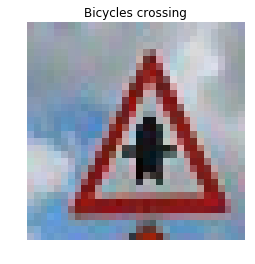

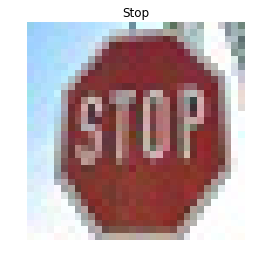

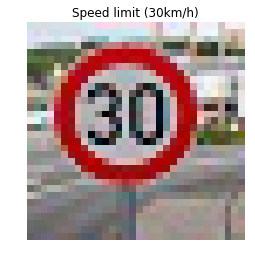

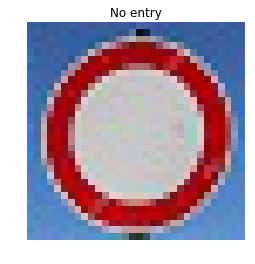

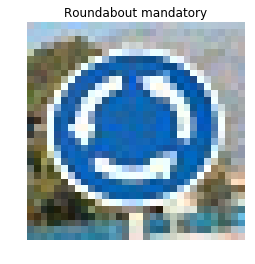

All the labels are annotated correctly! Great!


In [53]:
i=0
for img in images_:
    plt.imshow(img)
    plt.axis('off')
    plt.title(tag_name[1][my_labels[i]+1])
    plt.show()
    i+=1
print ('All the labels are annotated correctly! Great!')

### Rubric #8 Predict the Sign Type for Each Image

In [62]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#images = np.concatenate(images_gry,axis=0)
my_single_item_array = []
my_single_item_label_array = []

for i in range(5):
    my_single_item_array.append(my_images_normalized[i])
    my_single_item_label_array.append(my_labels[i])
    #print (my_labels[i])
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.000
Test Set Accuracy = 0.500
Test Set Accuracy = 0.333
Test Set Accuracy = 0.250
Test Set Accuracy = 0.400


In [59]:
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

### Rubric #9 Model Certainty - Softmax Probabilities

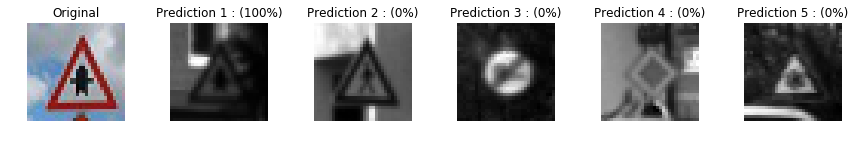

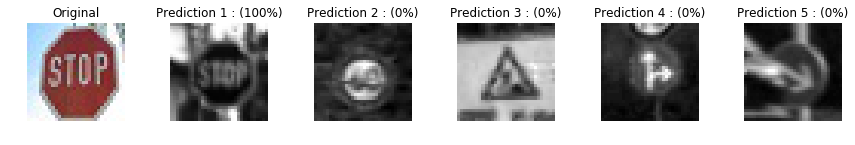

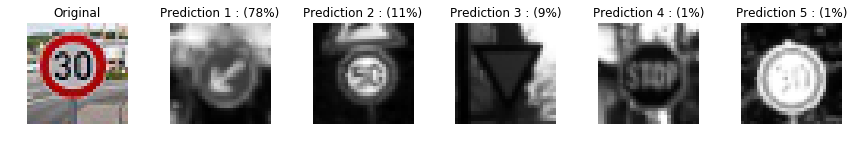

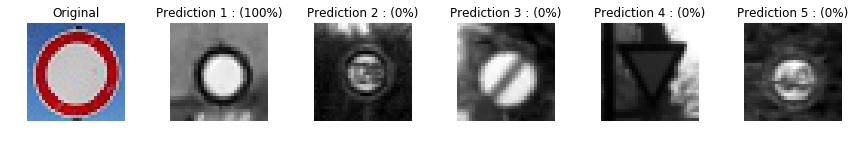

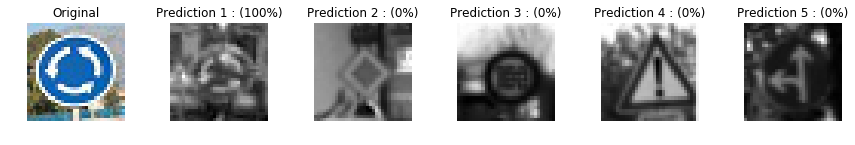

In [60]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, drop_out: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, drop_out: 1.0})

    for i in range(5):
        figures = {}
        labels = {}
        
        figures[0] = images_[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = 'Prediction {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
        plot_figures(figures, 1, 6, labels)

### Conclusion and Furhter Improvement

The model worked well having more than ~95% accuracy.  Prepossing and model modification I have used to improve the accuracy of the LaNet.I wanted to use AlexNet, But later found out that AlexNet works well for lager image size. using VGG16, Residual Network can be explored for further improvemt of the traffic sign classifer. 